<a href="https://colab.research.google.com/github/idjoopal/MLFW_study/blob/master/11_Class_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class Imbalance

---

비즈니스 상황에서 타겟 클래스의 불균형은 굉장히 흔한 현상
> * 고객 이탈 예측 : 잔존 > 이탈
* 금융 비정상 거래 예측 : 정상 > 비정상(사기거래)
* 제조 공정간 불량 예측 : 정상 > 불량


## 1.불균형 데이터

### 1) 라이브러리, 데이터 준비

In [1]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 예제 파일을 불러옵니다.
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/class_imbalance_example.csv"
data = pd.read_csv(path)
data.columns = ['x1', 'x2', 'y']
data.head()

,x1,x2,y
0,0.177451,-1.836462,0
1,0.483349,1.441359,0
2,-0.282035,-1.191999,0
3,-0.630565,1.411177,0
4,-2.546617,0.076647,1


### 2) 데이터 둘러보기

In [3]:
# 기초통계량
data.describe()

,x1,x2,y
count,1.000000e+02,1.000000e+02,100.000000
mean,7.993606e-16,-1.598721e-16,0.100000
std,1.716020e+00,1.400297e+00,0.301511
min,-3.735253e+00,-3.014357e+00,0.000000
25%,-9.949995e-01,-9.438397e-01,0.000000
50%,-2.958005e-02,7.189868e-02,0.000000
75%,1.030211e+00,8.911190e-01,0.000000
max,4.574572e+00,3.317229e+00,1.000000


0    90
1    10
Name: y, dtype: int64


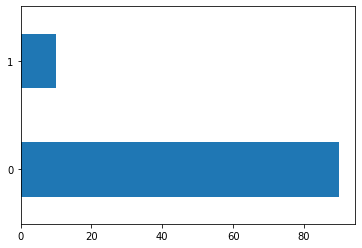

In [4]:
# class imbalance
print(data['y'].value_counts())

data['y'].value_counts().plot(kind = 'barh')
plt.show()

In [5]:
# 데이터를 x와 y로 분할
target = 'y'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [6]:
# 산점도를 클래스별로 구분해서 그리는 간단한 함수를 만듭니다.
def my_scatter(x, y, title = "") :
    temp = pd.DataFrame(x.copy())
    temp['y'] = y

    data0 = temp.loc[temp['y']== 0]
    data1 = temp.loc[temp['y']== 1]

    print(f'0 : {data0.shape[0]} , 1: {data1.shape[0]}')
    plt.title(title)
    plt.scatter(data0.iloc[:,0], data0.iloc[:,1], label = '0', alpha = .7)
    plt.scatter(data1.iloc[:,0], data1.iloc[:,1], label = '1', alpha = .7)
    plt.xlim(-5,5)
    plt.ylim(-3.5, 3.5)
    plt.legend()
    plt.show()

0 : 90 , 1: 10


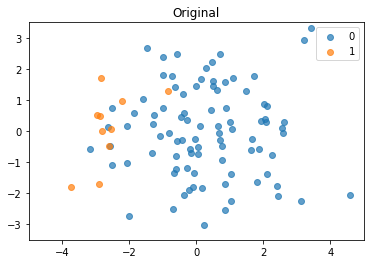

In [7]:
my_scatter(x, y, 'Original')

### 3) 그대로 모델링 수행

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [9]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .4, random_state=2022)

In [10]:
# 모델링 및 평가
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[37  0]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.33      0.50         3

    accuracy                           0.95        40
   macro avg       0.97      0.67      0.74        40
weighted avg       0.95      0.95      0.94        40



## 2.Resampling

In [11]:
# 필요한 함수들을 불러옵니다.
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

### 1.Down sampling

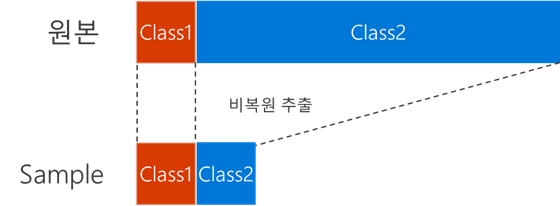

0 : 90 , 1: 10


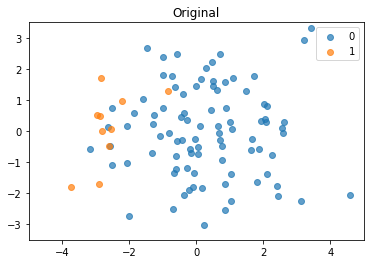

0 : 10 , 1: 10


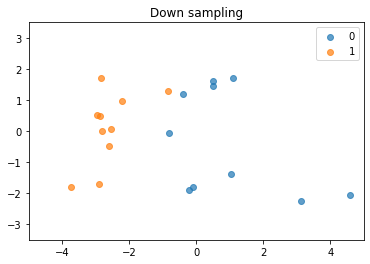

In [12]:
# Down sampling : 적은 쪽 클래스는 그대로, 많은 쪽 클래스는 랜덤 샘플링(적은쪽 클래수 수 만큼)
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(x, y)

my_scatter(x, y, 'Original')
my_scatter(X_rus, y_rus, 'Down sampling')

### 2.Up sampling

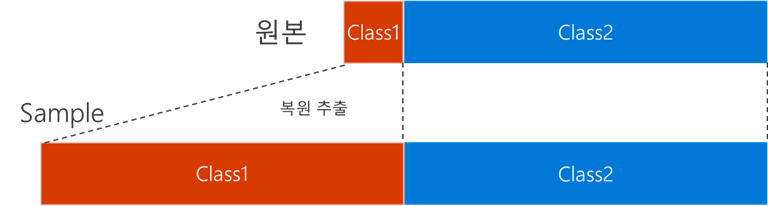

0 : 90 , 1: 10


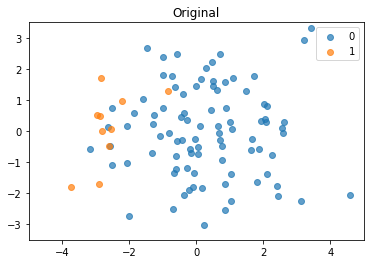

0 : 90 , 1: 90


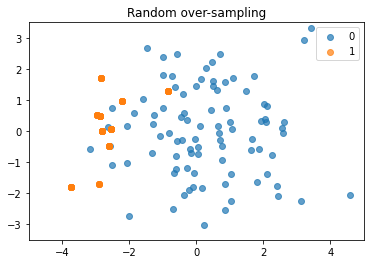

In [13]:
# Up sampling : 많은 클래스는 그대로, 적은 클래스는 랜덤 복원추출(많은 클래스 만큼)
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x, y)

my_scatter(x, y, 'Original')
my_scatter(X_ros, y_ros, 'Random over-sampling')

In [14]:
# 데이터를 열어보면, 클래스 1의 값이 중복으로 추출된 것을 볼수 있습니다.
UpSample = pd.DataFrame(X_ros, columns=['x1','x2'])
UpSample['y'] = y_ros
UpSample.loc[UpSample['y'] == 1].sort_values('x1')

,x1,x2,y
162,-3.735253,-1.806453,1
170,-3.735253,-1.806453,1
154,-3.735253,-1.806453,1
119,-3.735253,-1.806453,1
159,-3.735253,-1.806453,1
...,...,...,...
130,-0.843995,1.274816,1
9,-0.843995,1.274816,1
177,-0.843995,1.274816,1
113,-0.843995,1.274816,1


In [15]:
# 랜덤 복원 추출을 하다보니, 모든 값이 동일한 수 만큼 추출된 것이 아니라, 각각 다르게 추출됨
UpSample.loc[UpSample['y'] == 1].value_counts()

x1         x2         y
-2.546617   0.076647  1    15
-2.881623   0.478477  1    11
-2.816880  -0.004912  1    10
-0.843995   1.274816  1     9
-3.735253  -1.806453  1     9
-2.221968   0.960741  1     8
-2.594960  -0.474282  1     8
-2.854326   1.708045  1     8
-2.968055   0.526068  1     7
-2.916768  -1.692535  1     5
dtype: int64

### 3.SMOTE(**S**ynthetic **M**inority **O**versampling **TE**chnique)

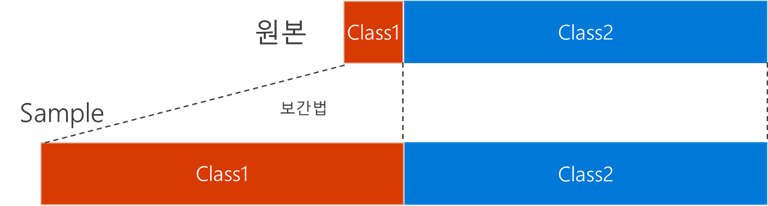

0 : 90 , 1: 10


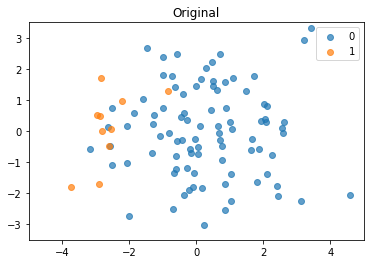

0 : 90 , 1: 90


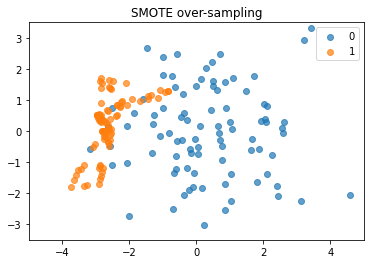

In [16]:
# SMOTE : 많은쪽은 그대로(혹은 약간 down sampling), 적은쪽은 보간법!
smote = SMOTE() # k_neighbors의미 확인
X_sm, y_sm = smote.fit_resample(x, y)

my_scatter(x, y, 'Original')
my_scatter(X_sm, y_sm, 'SMOTE over-sampling')

In [17]:
# 데이터를 열어보면 값들이 보간법으로 생성된 것을 볼수 있다.
SMOTESample = pd.DataFrame(X_sm.copy(), columns=['x1','x2'])
SMOTESample['y'] = y_sm
SMOTESample.loc[SMOTESample['y'] == 1].sort_values('x1')

,x1,x2,y
71,-3.735253,-1.806453,1
134,-3.644401,-1.563269,1
172,-3.586777,-1.409025,1
113,-3.531264,-1.260433,1
130,-3.433389,-1.214298,1
...,...,...,...
173,-1.158984,1.053152,1
119,-1.094561,1.328814,1
107,-0.928441,1.255569,1
115,-0.858677,1.277980,1
